In [1]:
import numpy as np
import matplotlib.pyplot as plt

## TRANSFORMAÇÃO LINEAR

In [2]:
def compare_transformations(A, NUM = 500):
  # ||x||² = 1
  x = np.linspace(-1, 1, NUM)
  y = (1 - x**2)**0.5

  # Ax = b
  vectors = []
  for i in range(NUM):
    vectors.append(np.array([x[i], y[i]]).T)

  for i in range(NUM):
    vectors.append(np.array([x[i], -y[i]]).T)

  X = np.array(vectors)
  Bx = []
  By = []
  for c in X:
    res = np.matmul(A, c)
    Bx.append(res[0])
    By.append(res[1])

  plt.figure(figsize=(6, 6), dpi=80)

  plt.plot(x, y, "o", color="red")
  plt.plot(x, -y, "o", color="red")
  plt.plot(Bx, By, "o", color="blue")
  plt.show()

  x = np.random.rand(NUM)
  y = np.random.rand(NUM)

  xlinha = []
  ylinha = []
  for i in range(NUM):
    res = np.matmul(A, [x[i], y[i]])
    xlinha.append(res[0])
    ylinha.append(res[1])

  plt.plot(x, y, "o", color="red")
  plt.plot(xlinha, ylinha, "o", color="blue")
  plt.show()


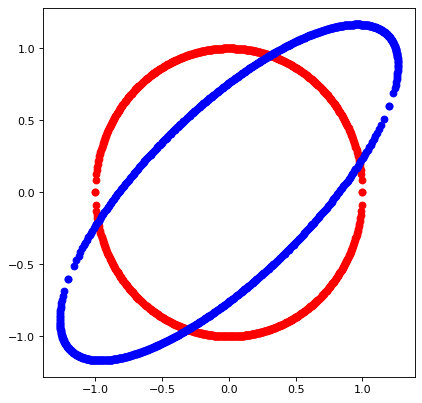

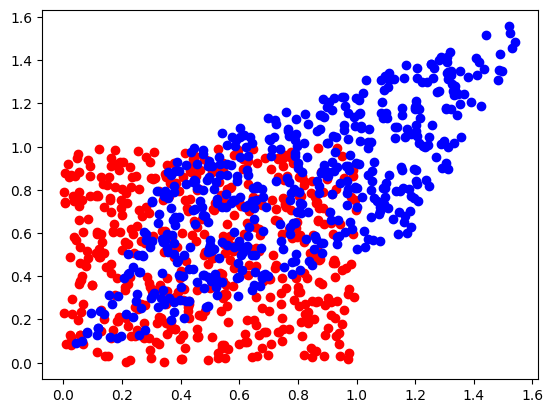

In [3]:
A = np.array([[1.2, 0.4], [0.6, 1]])
compare_transformations(A)

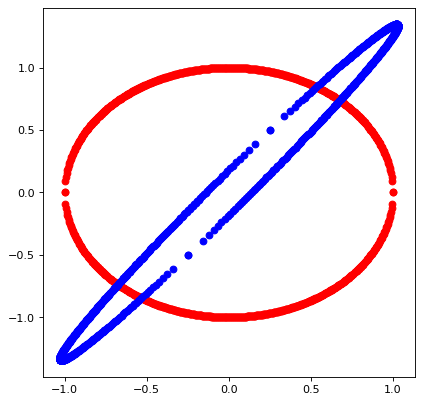

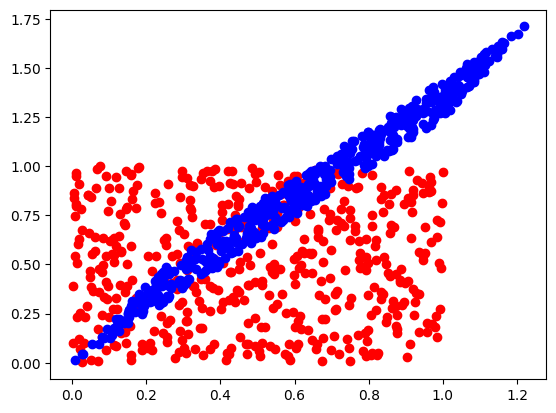

In [4]:
A = np.array([[0.5, 2], [1, 2.5]])
A /= 2
compare_transformations(A)

In [5]:
def compare_differents_norms(p = 2, NUM=20000):
  # ||x||² = 1
  x = np.linspace(-1, 1, NUM)
  y = (1 - abs(x**p))**(1/p)

  plt.figure(figsize=(8, 8))
  plt.title(f"Using different points with p = {p} on norm equation.")
  plt.plot(x, y, marker="o", color="green")
  plt.plot(x, -y, marker="o", color="green")
  plt.show()

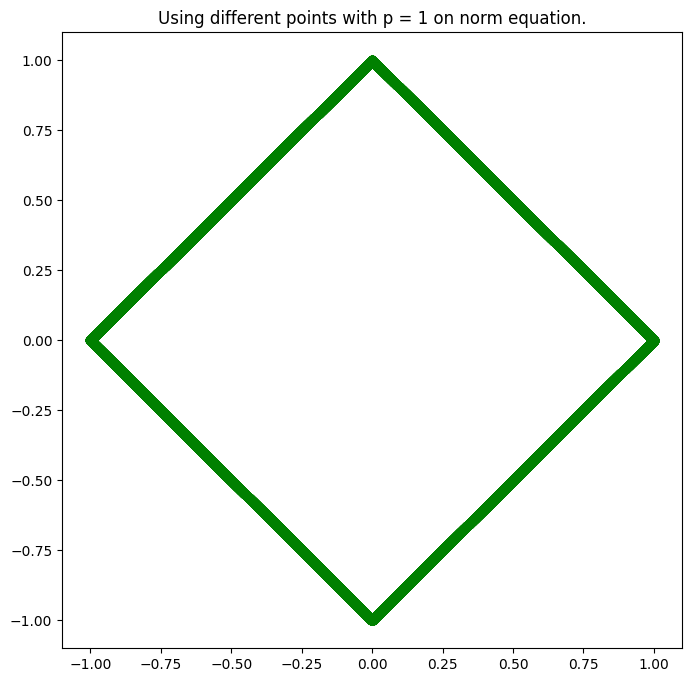

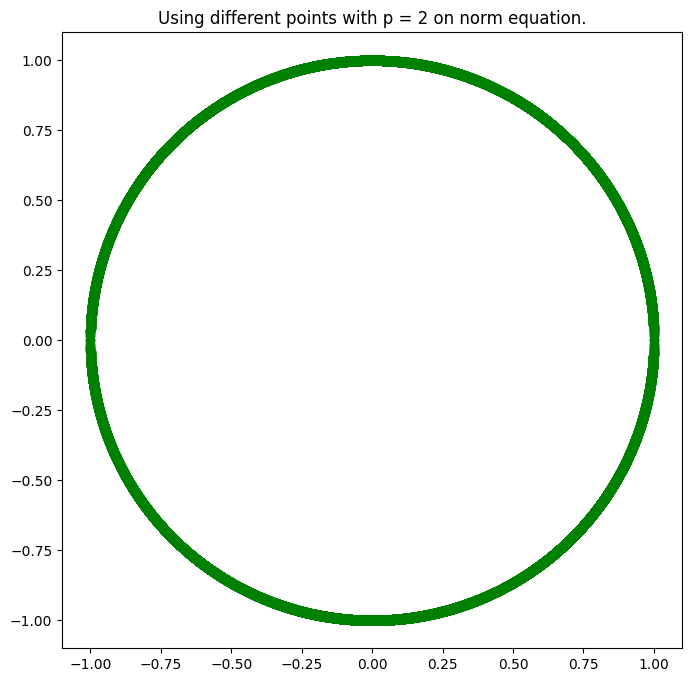

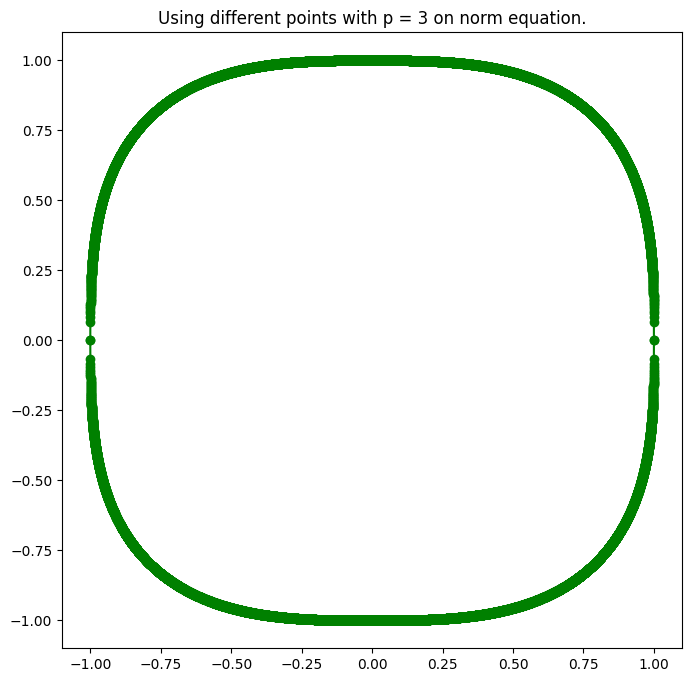

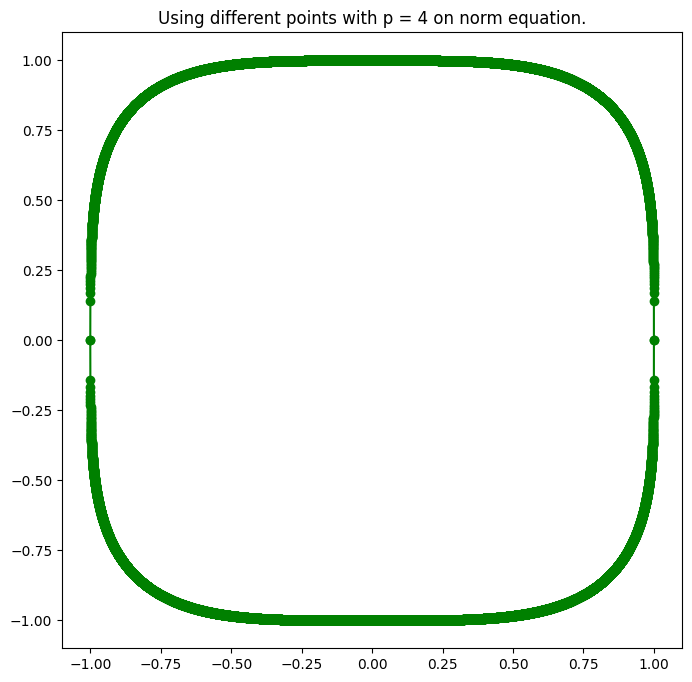

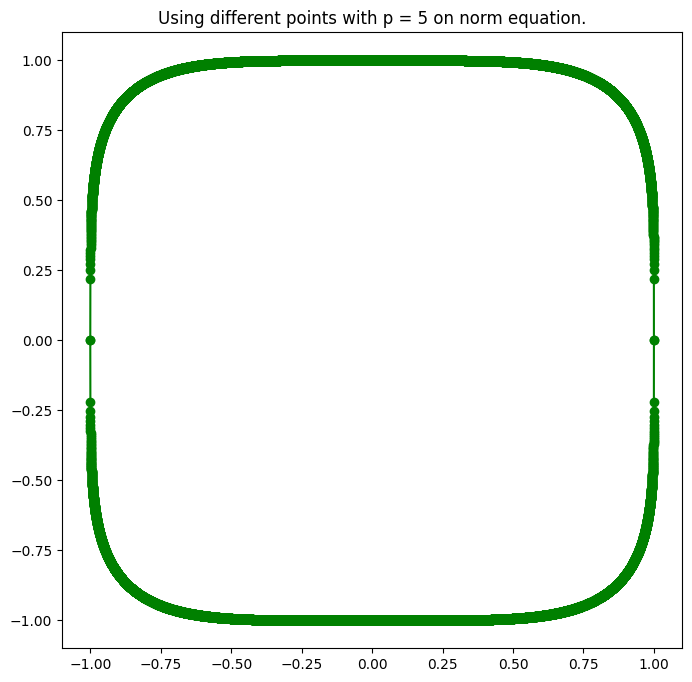

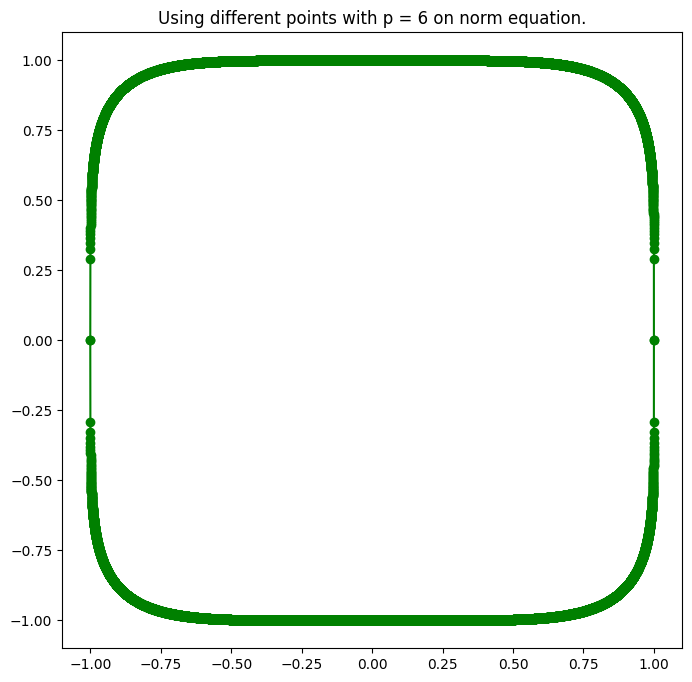

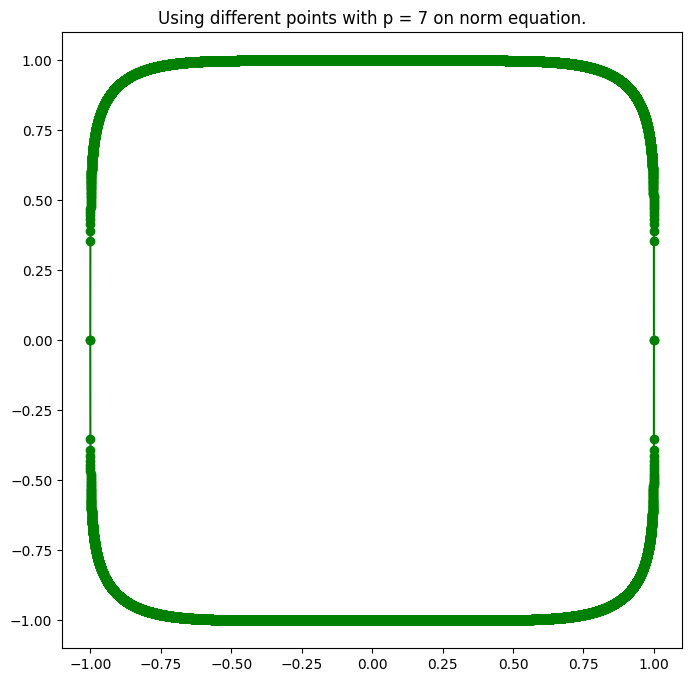

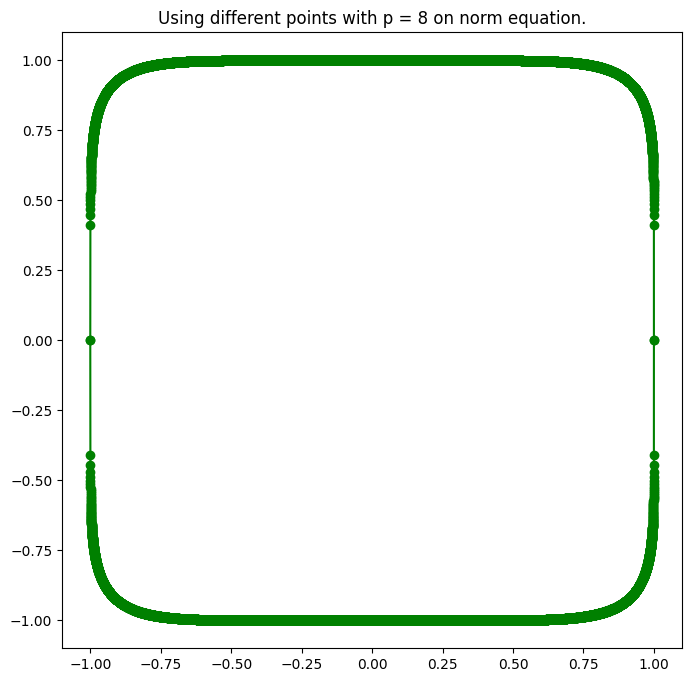

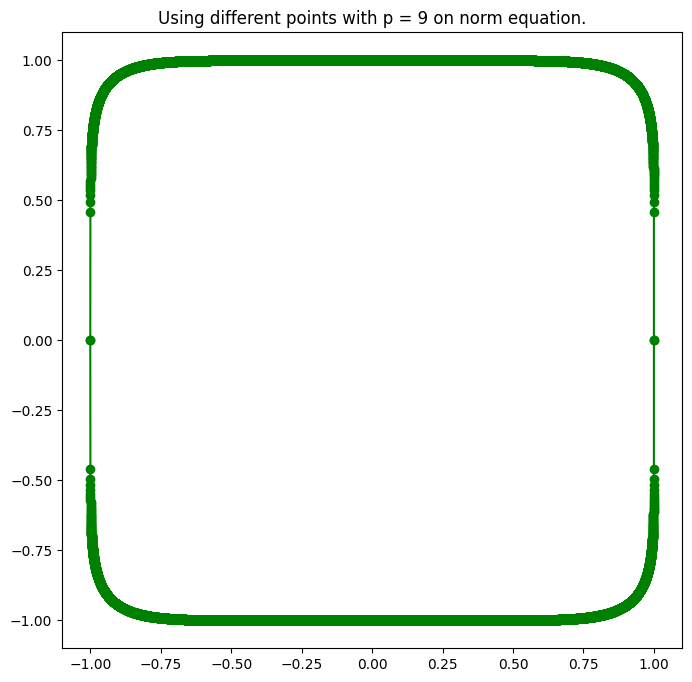

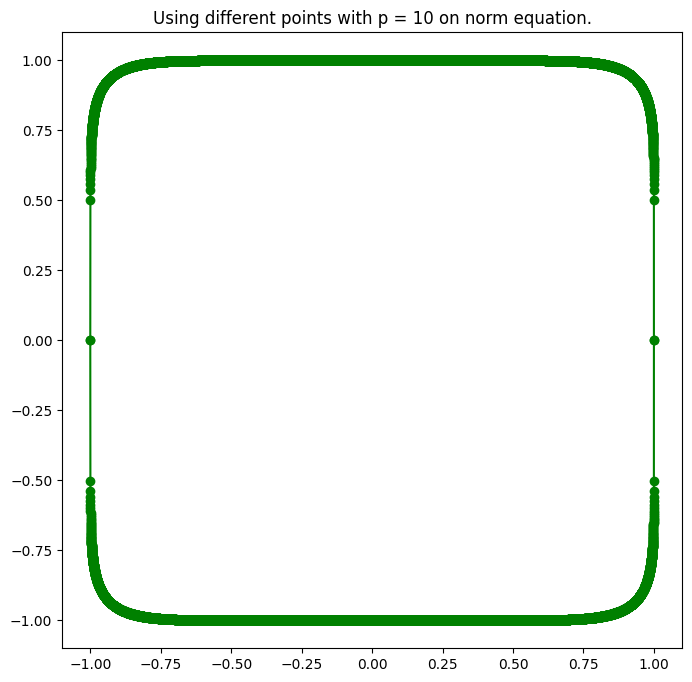

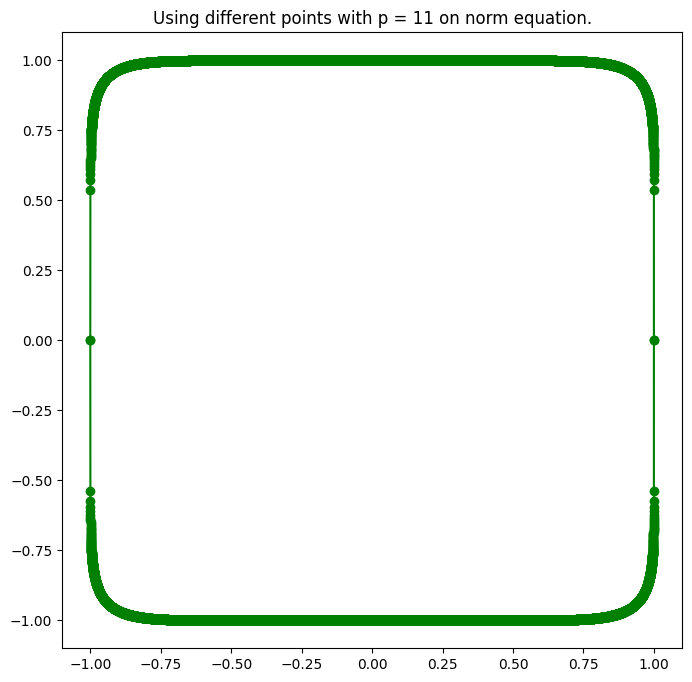

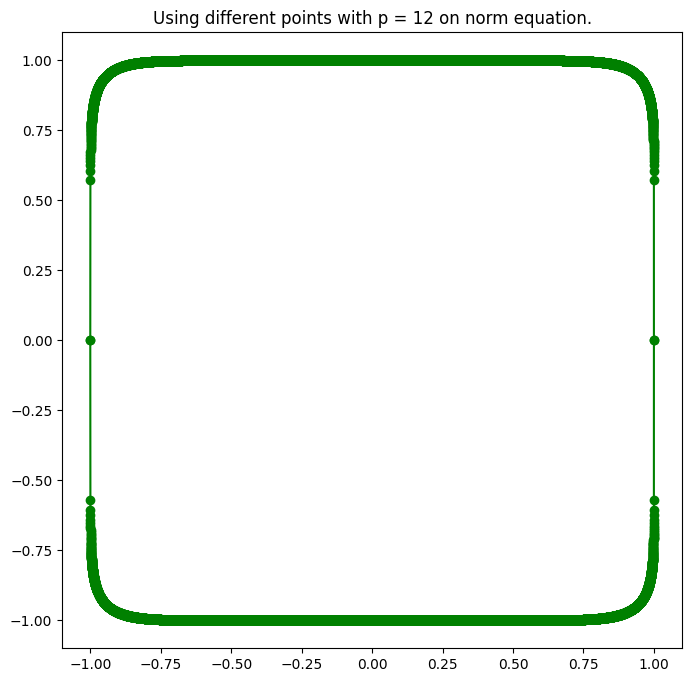

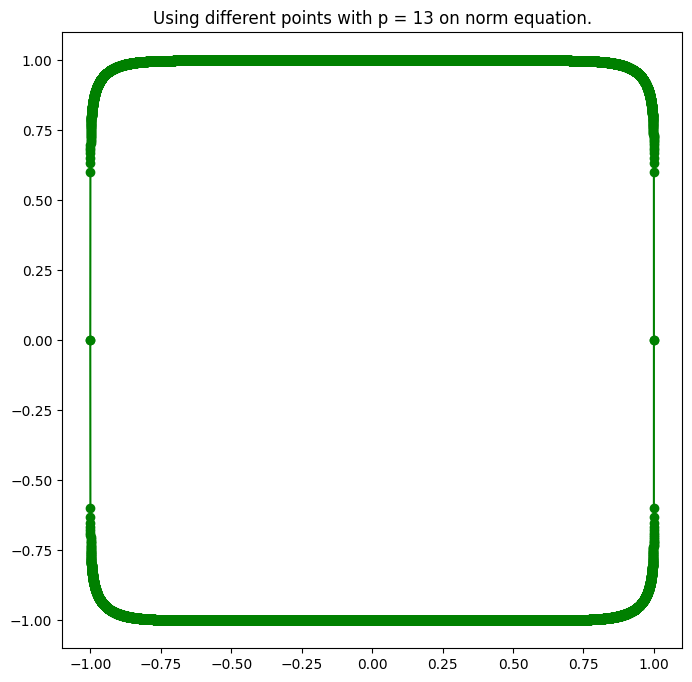

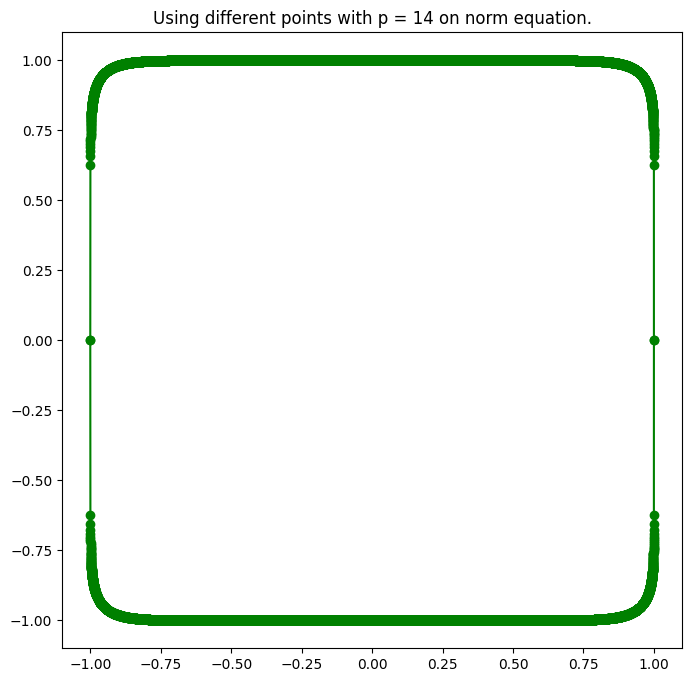

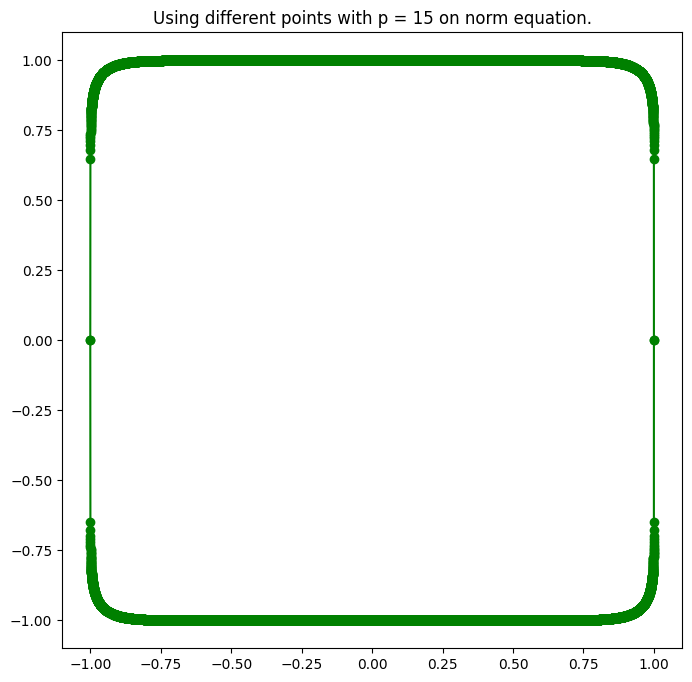

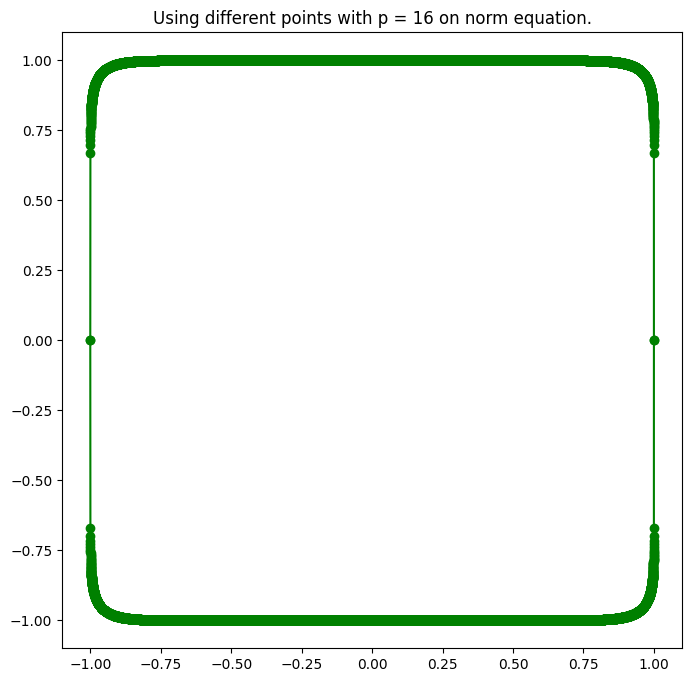

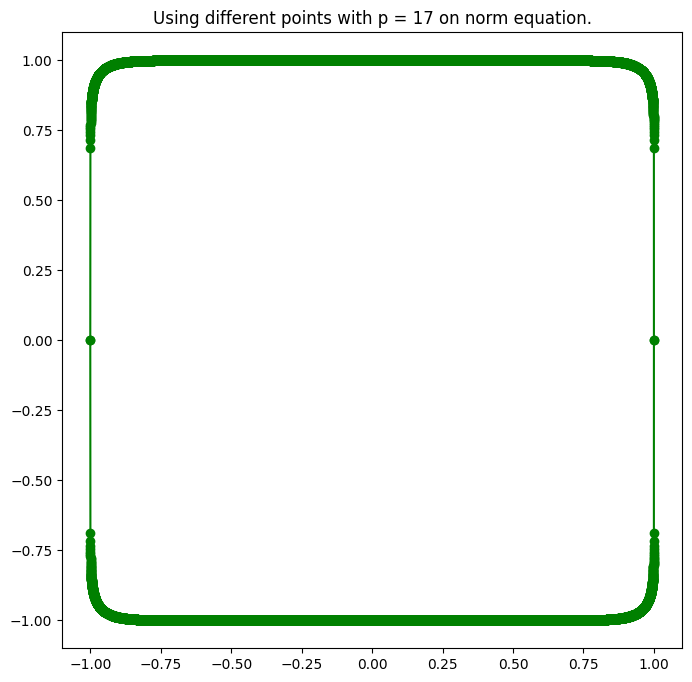

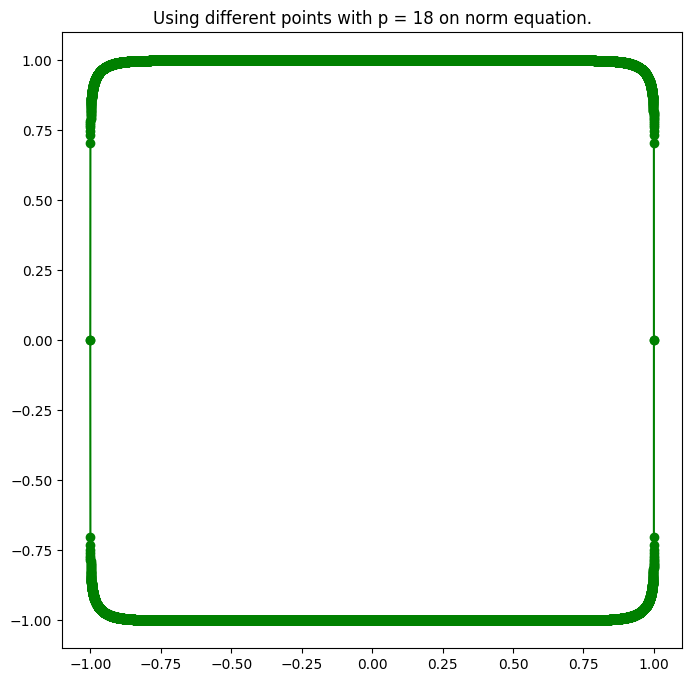

KeyboardInterrupt: 

In [6]:
import time

for p in range(20):
  compare_differents_norms(p+1)
  time.sleep(3)

# Treino para prova

In [7]:
import random
import numpy as np

## PA = LU

In [15]:
# Criando matrizes L, U e P^-1
N = 3
L = np.zeros((N, N))
U = np.zeros((N, N))
P = np.zeros((N, N))

for i in range(N):
  for j in range(i+1):
    L[i][j] = float(random.randint(-8, 8))

for i in range(N):
  for j in range(i, N):
    U[i][j] = float(random.randint(-8, 8))

print("L:\n",L)
print("U:\n",U)
pos = list(range(N))
for i in range(N):
  p = random.choice(pos)
  P[i][p] = 1
  pos.remove(p)

Pi = np.linalg.inv(P)
np.matmul(np.matmul(L, U), Pi)

L:
 [[4. 0. 0.]
 [6. 4. 0.]
 [7. 7. 0.]]
U:
 [[-3. -2.  1.]
 [ 0.  4. -7.]
 [ 0.  0.  5.]]


array([[-12.,  -8.,   4.],
       [-18.,   4., -22.],
       [-21.,  14., -42.]])

## Cholesky

In [19]:
# Q = LL^t
N = 4

L = np.zeros((N, N))
for i in range(N):
  for j in range(i+1):
    L[i][j] = random.randint(1, 4)

Q = np.matmul(L, L.T)

print("Matriz Q:\n")
for i in range(N):
  for j in range(N):
    num = int(Q[i][j])
    print(num, end=" ")
  print()

print()
input()
print("\nMatriz L:\n")

for i in range(N):
  for j in range(N):
    num = int(L[i][j])
    print(num, end=" ")
  print()

Matriz Q:

9 9 3 9 
9 10 5 12 
3 5 6 10 
9 12 10 35 


Matriz L:

3 0 0 0 
3 1 0 0 
1 2 1 0 
3 3 1 4 


## Norma / Mal Condicionamento

In [ ]:
N = 2
A = np.zeros((N, N))

for i in range(N):
  for j in range(N):
    A[i][j] = int(random.randint(1, 8))

print("Matriz: \n")
for i in range(N):
  for j in range(N):
    num = int(A[i][j])
    print(num, end=" ")
  print()

print()
input()
print("At * A")
for i in range(N):
  for j in range(N):
    num = int(np.matmul(A.T, A)[i][j])
    print(num, end=" ")
  print()
print()
print("Normas:")
print(f"1 = {np.linalg.norm(A, 1)}")
print(f"2 = {np.linalg.norm(A, 2)}")
print(f"inf = {np.linalg.norm(A, np.inf)}")

# Kp = ||A||p * ||A^-1||p
k = np.linalg.cond(A)
print("\nCondicionamento")
print(f"k2 = {k} ")

Matriz: 

5 4 
6 2 

At * A
61 32 
32 20 

Normas:
1 = 11.0
2 = 8.860208199095537
inf = 9.0

Condicionamento
k2 = 5.607377809379986 


## Ajuste de Curva

Matrix A:

1.0 1.0 1.0 
1.0 1.5 2.25 
1.0 2.0 4.0 
1.0 2.5 6.25 
1.0 3.0 9.0 

Matrix b:

-10.0
-14.0
-21.0
-34.0
-41.0



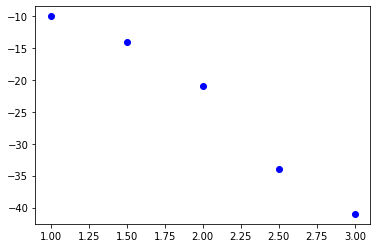

In [ ]:
# Definição aleatória de uma função quadrática

import matplotlib.pyplot as plt

a = random.randint(-5, 5)
b = random.randint(-5, 5)
c = random.randint(-5, 5)

X = np.arange(1, 3.5, 0.5)

Ncol = 3
A = np.zeros((5, Ncol))
B = np.zeros((5, 1))

for i in range(5):
  A[i][0] = 1
  A[i][1] = X[i]
  A[i][2] = X[i]**2
  # noise
  B[i] = a*(X[i]**2) + b*X[i] + c + random.randint(-3, 3)

At = np.matmul(A.T, A)
S = np.matmul(A.T, B)

Xh = np.linalg.solve(At, S)

print("Matrix A:\n")
for i in range(5):
  for j in range(Ncol):
    print(A[i][j], end=" ")
  print()

print("\nMatrix b:\n")
for i in range(5):
  print(B[i][0])

print()
plt.plot(A[:, 1], B[:, 0], 'bo')
plt.show()
input()

x = np.linspace(A[:, 1].min()-1, A[:, 1].max()+1,100)
y = (x**2)*Xh[2][0] + x*Xh[1][0] + Xh[0][0]
plt.plot(A[:, 1], B[:, 0], 'bo')
plt.plot(x, y, '-r', label='y=2x+1')
plt.show()

print()
print(f"y = {Xh[2][0]}*x² + {Xh[1][0]}*x + {Xh[0][0]}")